In [88]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Directory containing the dataset

In [90]:
dataset_dir = r"E:\Face Recognition\Dataset\Faces"

In [91]:
dataset_dir

'E:\\Face Recognition\\Dataset\\Faces'

# Target size for resizing images

In [93]:
image_size = (128, 128)

# Initialize lists to store images and labels

In [95]:
images = []
labels = []

# Variables to store a few example images for demonstration


In [97]:
example_images_original = []
example_images_preprocessed = []

# Number of example images to show

In [99]:
num_examples = 5


# Loop through each celebrity folder in the dataset directory

Loaded 5 images from the dataset.


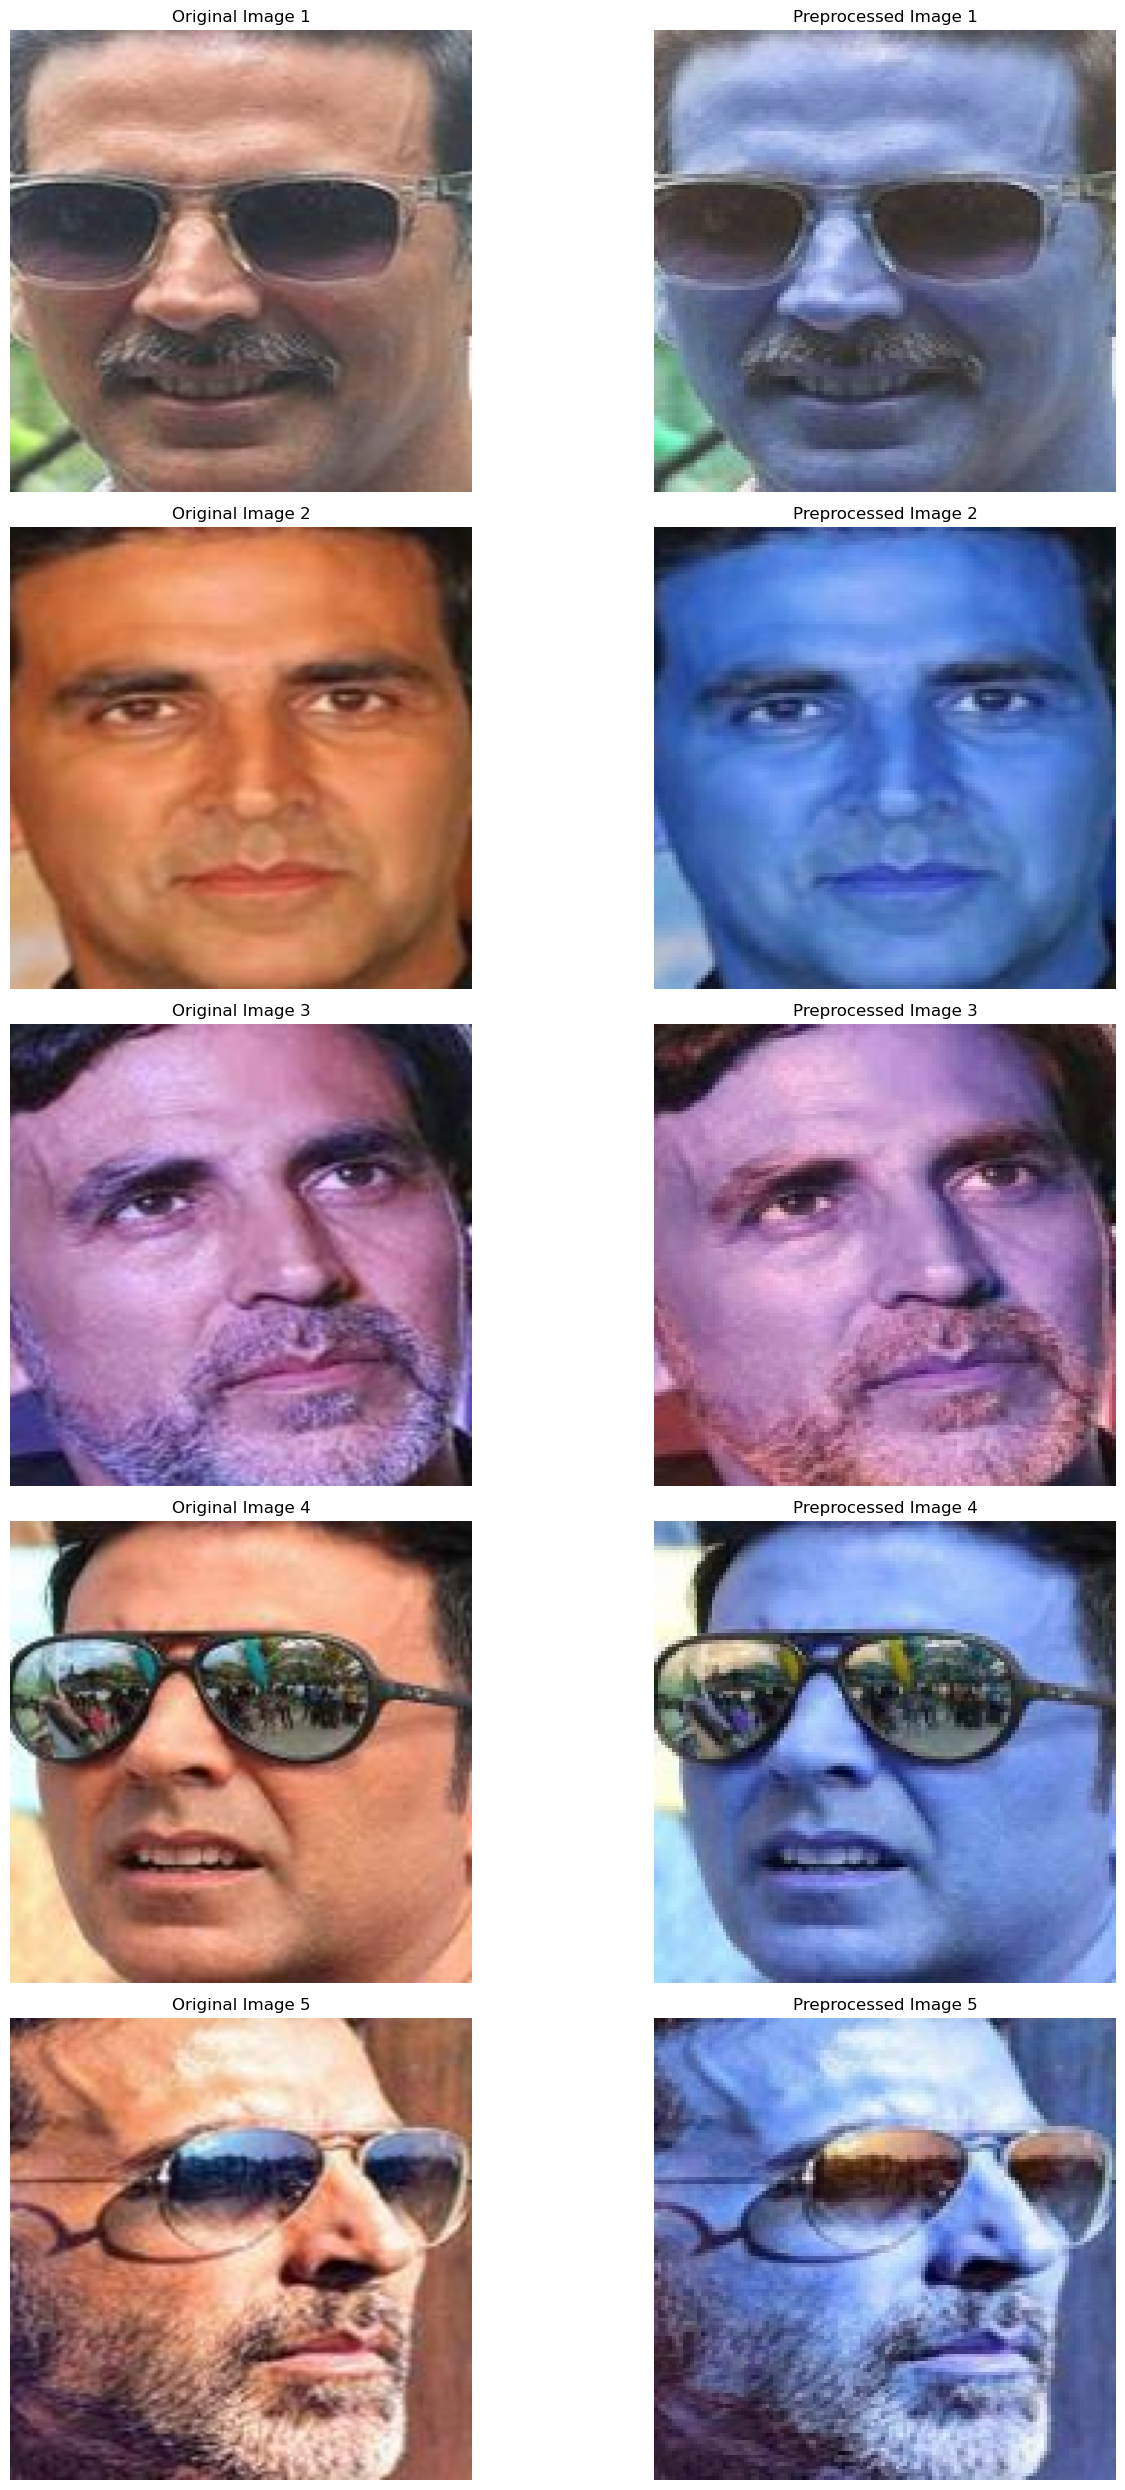

In [100]:
for label in os.listdir(dataset_dir):
    label_dir = os.path.join(dataset_dir, label)
    if os.path.isdir(label_dir):
        # Loop through each image in the celebrity's folder
        for image_name in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_name)
            
            # Load the image
            image = cv2.imread(image_path)
            
            if image is not None:
                # Store a few example images for visualization
                if len(example_images_original) < num_examples:
                    example_images_original.append(image)
                    
                # Resize the image
                image_resized = cv2.resize(image, image_size)
                
                # Normalize the image
                image_normalized = image_resized.astype('float32') / 255.0
                
                # Store the preprocessed images for visualization
                if len(example_images_preprocessed) < num_examples:
                    example_images_preprocessed.append(image_normalized)
                
                # Append the image and the corresponding label
                images.append(image_normalized)
                labels.append(label)
                
                # Stop after collecting enough examples
                if len(example_images_original) >= num_examples:
                    break
        if len(example_images_original) >= num_examples:
            break

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Print the number of images loaded
print(f"Loaded {len(images)} images from the dataset.")

# Function to display images
def show_images(original_images, preprocessed_images):
    # Create a figure with a grid of subplots
    num_images = len(original_images)
    plt.figure(figsize=(15, num_images * 5))
    
    for i in range(num_images):
        # Original images
        plt.subplot(num_images, 2, 2 * i + 1)
        plt.imshow(cv2.cvtColor(original_images[i], cv2.COLOR_BGR2RGB))
        plt.title(f'Original Image {i+1}')
        plt.axis('off')
        
        # Preprocessed images
        plt.subplot(num_images, 2, 2 * i + 2)
        plt.imshow(preprocessed_images[i])
        plt.title(f'Preprocessed Image {i+1}')
        plt.axis('off')
    
    # Display the images
    plt.tight_layout()
    plt.show()

# Show the example images
if example_images_original and example_images_preprocessed:
    show_images(example_images_original, example_images_preprocessed)
else:
    print("No images to display.")